## Drawing Board

In [3]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
def drawlattice(n, name):
    for i in range(1, n+1):
        for j in range(1, n+1):
            plt.plot(i,j,'o',c='black')
    plt.savefig(name)       

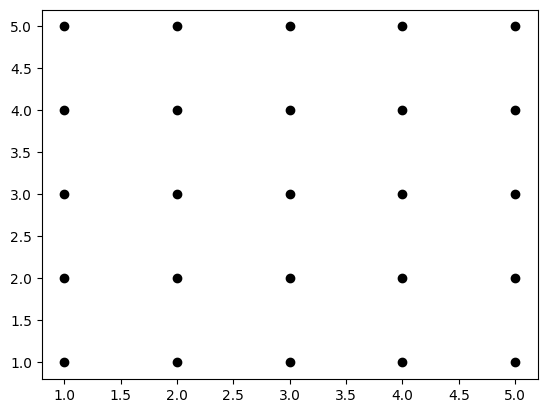

In [4]:
drawlattice(5,"lattice.png")

## Representing Game

In [8]:
game = [[(1,2),(1,1)],[(3,3),(4,3)],[(1,5),(2,5)],[(1,2),(2,2)],[(2,2),(2,1)],[(1,1),(2,1)],[(3,4),(3,3)],[(3,4),(4,4)]]

In [9]:
def drawgame(n, name, game):
    colors2=[]
    for k in range(0,len(game)):
        if k%2 == 0:
            colors2.append("red")
        else:
            colors2.append("blue")
    lc = mc.LineCollection(game,colors=colors2,linewidths=2)
    fig, ax = plt.subplots()
    for i in range(1, n+1):
        for j in range(1, n+1):
            plt.plot(i,j,'o',c='black')
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    plt.savefig(name)

## Scoring game

In [11]:
def squarefinder(game):
    countofsquares=0
    for line in game:
        parallel=False
        left=False
        right=False
        if line[0][1]==line[1][1]:
            if[(line[0][0],line[0][1]-1),(line[1][0],line[1][1]-1)] in game:
                parallel=True
            if[(line[0][0],line[0][1]),(line[1][0]-1,line[1][1]-1)] in game:
                left=True
            if[(line[0][0]+1,line[0][1]),(line[1][0],line[1][1]-1)] in game:
                right=True
            if parallel and left and right:
                countofsquares+=1
    return(countofsquares)

In [12]:
def score(game):
    score=[0,0]
    progress=[]
    squares=0
    for line in game:
        progress.append(line)
        newsquares = squarefinder(progress)
        if newsquares > squares:
            if len(progress)%2==0:
                score[1] = score[1]+1
            else:
                score[0]=score[0]+1
        squares=newsquares
    return(score)

In [13]:
def generate_tree(possible_moves,depth,maxdepth,game_so_far):
    tree=[]
    for move in possible_moves:
        move_profile=[move]
        game2=game_so_far.copy()
        game2.append(move)
        move_profile.append(score(game2))
        if depth < maxdepth:
            possible_moves2=possible_moves.copy()
            possible_moves2.remove(move)
            move_profile.append(generate_tree(possible_moves2,depth+1,maxdepth,game2))
        else:
            move_profile.append([])
        tree.append(move_profile)
    return tree
        
        

In [14]:
allpossible = [[(4,4),(4,3)],[(4,1),(5,1)]]
thetree = generate_tree(allpossible,0,1,[])
print(thetree)

[[[(4, 4), (4, 3)], [0, 0], [[[(4, 1), (5, 1)], [0, 0], []]]], [[(4, 1), (5, 1)], [0, 0], [[[(4, 4), (4, 3)], [0, 0], []]]]]


In [16]:
import numpy as np
def minimax(max_or_min,tree):
    allscores=[]
    for move_profile in tree:
        if move_profile[2]==[]:
            allscores.append(move_profile[1][0]-move_profile[1][1])
        else:
            move,score=minimax((-1)*max_or_min,move_profile[2])
            allscores.append(score)
    newlist=[score * max_or_min for score in allscores]
    bestscore = max(newlist)
    bestmove = np.argmax(newlist)
    return(bestmove, max_or_min*bestscore)

In [17]:
allpossible=[]
game = [[(1,2),(1,1)],[(3,3),(4,3)],[(1,5),(2,5)],[(1,2),(2,2)],[(2,2),(2,1)],[(1,1),(2,1)],[(3,4),(3,3)],[(3,4),(4,4)]]
gamesize=5
for i in range(1, gamesize+1):
    for j in range(2,gamesize+1):
        allpossible.append([(i,j),(i,j-1)])
for i in range(1, gamesize):
    for j in range(1,gamesize+1):
        allpossible.append([(i,j),(i+1,j)])
for move in allpossible:
    if move in game:
        allpossible.remove(move)

In [19]:
thetree = generate_tree(allpossible,0,3,game)

In [20]:
move, score = minimax(1,thetree)

In [21]:
print(thetree[move][0])

[(4, 4), (4, 3)]
